Clahe + Canny Edge Detection

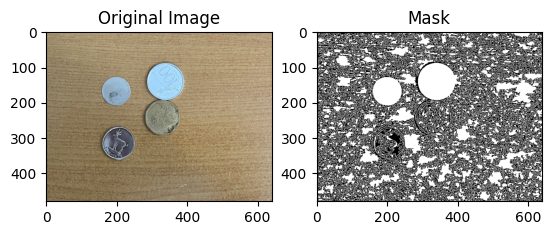

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = r"C:\Users\nuhai\Downloads\Challenge_1.jpg"
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error loading image")
    exit()

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Improve contrast
try:
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrasted_image = clahe.apply(gray_image)
except Exception as e:
    print(f"Error applying CLAHE: {e}")
    exit()

# Find edges
edges = cv2.Canny(contrasted_image, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask of zeros with the same shape as the original image
mask = np.zeros_like(gray_image)

# Draw contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Display the original image and the mask using matplotlib
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.show()


Using K-means Clustering

Reading the image: 0.0071 seconds
Converting to grayscale: 0.0000 seconds
Flattening image for K-means: 0.0010 seconds
Applying K-means clustering: 0.2235 seconds
Converting labels to image: 0.0000 seconds
Finding contours: 0.0125 seconds
Creating mask: 0.0000 seconds
Drawing contours on mask: 0.0342 seconds


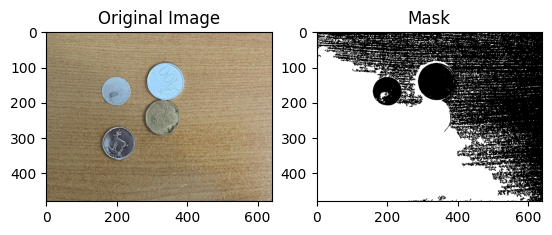

Displaying images with matplotlib: 0.1717 seconds
Total time taken: 0.4500 seconds


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to measure time
def measure_time(label, start_time):
    print(f"{label}: {time.time() - start_time:.4f} seconds")

# Start timing the entire process
start_total = time.time()

# Read the image
start = time.time()
image_path = r"C:\Users\nuhai\Downloads\Challenge_1.jpg"
image = cv2.imread(image_path)
measure_time("Reading the image", start)

# Check if the image is loaded correctly
if image is None:
    print("Error loading image")
    exit()

# Convert image to grayscale
start = time.time()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
measure_time("Converting to grayscale", start)

# Flatten the image for K-means clustering
start = time.time()
pixel_values = gray_image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)
measure_time("Flattening image for K-means", start)

# Define criteria and apply K-means clustering
start = time.time()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 2
_, labels, _ = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
labels = labels.flatten()
measure_time("Applying K-means clustering", start)

# Convert labels to image
start = time.time()
segmented_image = labels.reshape(gray_image.shape)
segmented_image = (segmented_image * 255).astype(np.uint8)
measure_time("Converting labels to image", start)

# Find contours
start = time.time()
contours, _ = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
measure_time("Finding contours", start)

# Create a mask of zeros with the same shape as the original image
start = time.time()
mask = np.zeros_like(gray_image)
measure_time("Creating mask", start)

# Draw contours on the mask
start = time.time()
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
measure_time("Drawing contours on mask", start)

# Display the original image and the mask using matplotlib
start = time.time()
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.show()
measure_time("Displaying images with matplotlib", start)

# Total time taken
measure_time("Total time taken", start_total)


Using Simple Thresholding

Reading the image: 0.0131 seconds
Converting to grayscale: 0.0000 seconds
Applying Gaussian blur: 0.0000 seconds
Applying simple thresholding: 0.0000 seconds
Finding contours: 0.0000 seconds
Creating mask: 0.0100 seconds
Drawing contours on mask: 0.0000 seconds


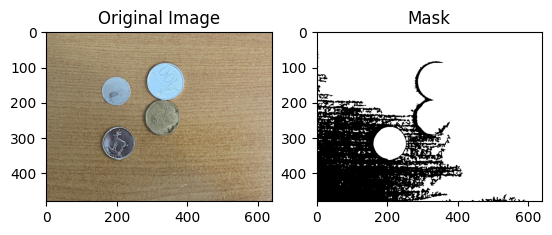

Displaying images with matplotlib: 0.3600 seconds
Total time taken: 0.3831 seconds


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to measure time
def measure_time(label, start_time):
    print(f"{label}: {time.time() - start_time:.4f} seconds")

# Start timing the entire process
start_total = time.time()

# Read the image
start = time.time()
image_path = r"C:\Users\nuhai\Downloads\Challenge_1.jpg"
image = cv2.imread(image_path)
measure_time("Reading the image", start)

# Check if the image is loaded correctly
if image is None:
    print("Error loading image")
    exit()

# Convert image to grayscale
start = time.time()
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
measure_time("Converting to grayscale", start)

# Apply Gaussian blur
start = time.time()
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
measure_time("Applying Gaussian blur", start)

# Apply simple thresholding
start = time.time()
_, thresh_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)
measure_time("Applying simple thresholding", start)

# Find contours
start = time.time()
contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
measure_time("Finding contours", start)

# Create a mask of zeros with the same shape as the original image
start = time.time()
mask = np.zeros_like(gray_image)
measure_time("Creating mask", start)

# Draw contours on the mask
start = time.time()
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
measure_time("Drawing contours on mask", start)

# Display the original image and the mask using matplotlib
start = time.time()
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(mask, cmap='gray'), plt.title('Mask')
plt.show()
measure_time("Displaying images with matplotlib", start)

# Total time taken
measure_time("Total time taken", start_total)


These alternative methods can be more suitable depending on the specific characteristics of your image and the desired output. The performance might vary, and it's often useful to try different approaches to see which works best for your particular case.